Analytics

In [37]:
#Exploration step
print('the average facebooklikes= ',df["movie_facebook_likes"].mean().round(2))
print('Max rate : ',df["imdb_score"].max())
print('Minimun rate : ',df["imdb_score"].min())
print('Number of voted people : ',df["num_voted_users"].sum())
print('The Average Budget : ',df["budget"].mean())
print('The most frequent country : ',df["country"].mode())


the average facebooklikes=  8156.85
Max rate :  9.3
Minimun rate :  1.6
Number of voted people :  400487166
The Average Budget :  39814126.0321229
The most frequent country :  0    USA
Name: country, dtype: object


In [ ]:
max_rate = df['imdb_score'].max()
rate = df[df['imdb_score'] == max_rate][['movie_title','genres','imdb_score']]
rate.columns = ['title','genres','rate']
min_rate =df['imdb_score'].min()
rate2 = df[df['imdb_score'] == min_rate][['movie_title','genres','imdb_score']]
rate2.columns = ['title','genres','rate']
rate = pd.concat([rate,rate2])
rate.reset_index(drop=True,inplace=True)
rate

,title,genres,rate
0,The Shawshank Redemption,Crime,9.3
1,Justin Bieber: Never Say Never,Documentary,1.6


<ipython-input-11-b7dd16064ee9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='movie_count', y='country', data=top_10, palette='Dark2')  # Horizontal bar plot


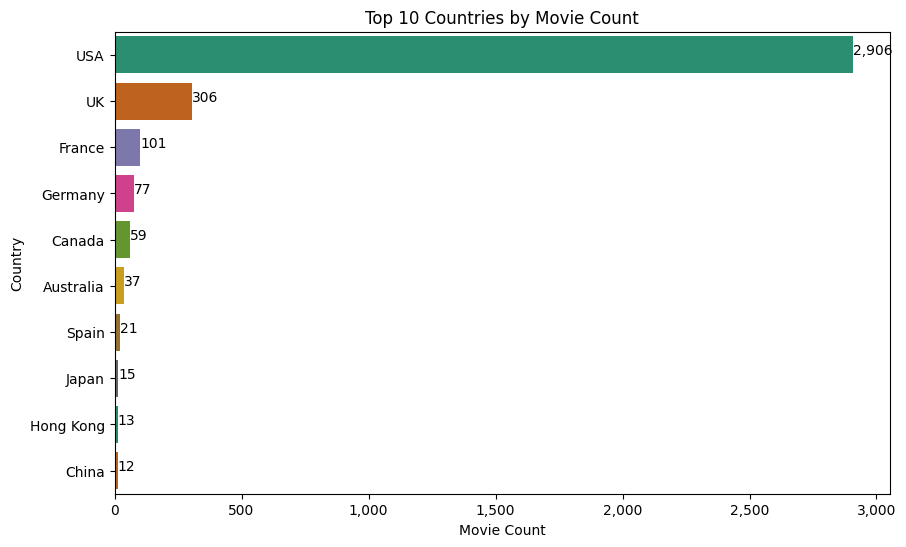

In [ ]:

# Group by 'country' and count the number of 'movie_title', then sort by 'movie_count' in descending order
grouped = df.groupby('country')['movie_title'].count().reset_index(name='movie_count').sort_values(by='movie_count', ascending=False)

# Select the top 10 rows
top_10 = grouped.head(10)

# Plot the top 10 values using seaborn with horizontal bars
plt.figure(figsize=(10, 6))
sns.barplot(x='movie_count', y='country', data=top_10, palette='Dark2')  # Horizontal bar plot

# Add values to each bar
for index, value in enumerate(top_10['movie_count']):
    # Format the value with commas and no decimal places
    formatted_value = f"{value:,.00f}"
    plt.text(value, index, str(formatted_value))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:,.0f}"))
plt.title('Top 10 Countries by Movie Count')
plt.xlabel('Movie Count')
plt.ylabel('Country')
plt.show()


In [55]:
genre =df['genres'].str.split('|', expand=True).stack().value_counts()
print(genre)

Drama          2203
Comedy         1660
Thriller       1228
Action         1022
Romance         982
Adventure       825
Crime           785
Sci-Fi          546
Fantasy         537
Family          474
Horror          471
Mystery         430
Biography       270
Animation       212
War             185
Music           183
History         179
Sport           167
Musical         116
Western          83
Documentary      64
Film-Noir         5
News              1
Name: count, dtype: int64


<ipython-input-64-84f318965660>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='imdb_score', y='genres', data=groupedrate, palette='coolwarm',legend=False)


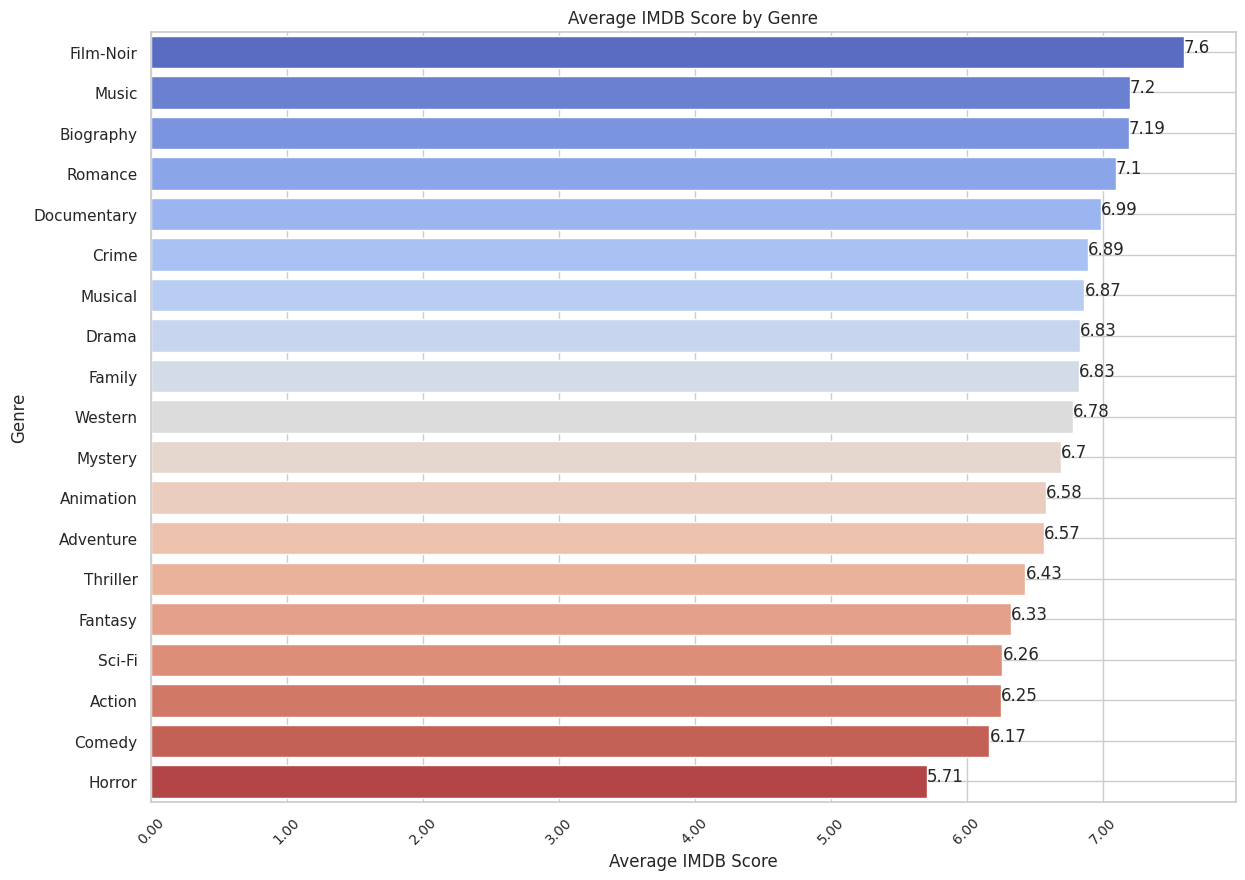

In [64]:
# Set the style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(14, 10))

groupedrate = df.groupby('genres')['imdb_score'].mean().sort_values(ascending=False).reset_index() # Convert the Series to DataFrame
sns.barplot(x='imdb_score', y='genres', data=groupedrate, palette='coolwarm',legend=False)

# Add values to each bar
for index,value in enumerate(groupedrate['imdb_score']):

    plt.text(value,index,str(round(value,2)))

# Customize the x-axis ticks for better readability
#This line of code customizes the formatting of the major tick labels on the x-axis.
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels and set font size

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:,.2f}"))
plt.grid(True)

plt.title('Average IMDB Score by Genre')
plt.xlabel('Average IMDB Score')
plt.ylabel('Genre')
plt.show()


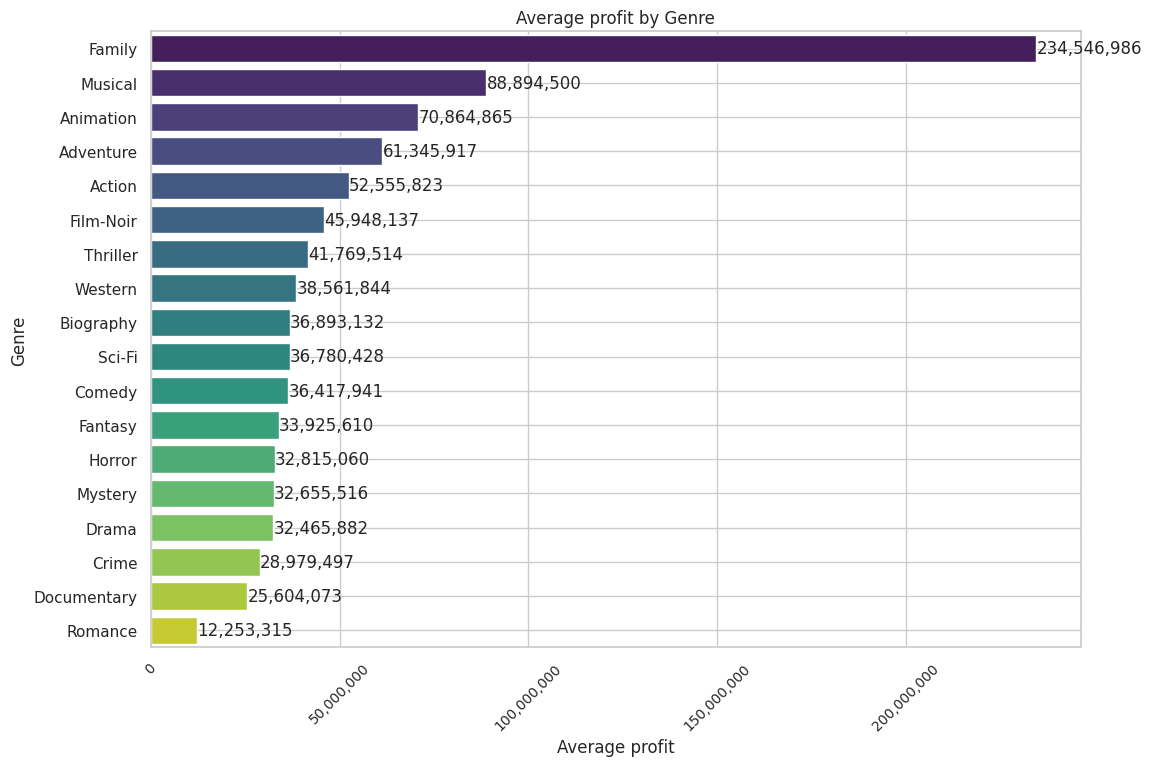

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Filter the DataFrame to include only positive profit values
positive_profit_df = df[df['profit'] > 0]

# Group by 'genres' and calculate the mean profit, then sort and reset the index
groupedrate = positive_profit_df.groupby('genres')['profit'].mean().sort_values(ascending=False).reset_index()

# Create a bar plot with 'hue' set to 'genres' and legend disabled
sns.barplot(x='profit', y='genres', hue='genres', data=groupedrate, palette='viridis', dodge=False, legend=False)

# Add values to each bar
for index, value in enumerate(groupedrate['profit']):
    # Format the value with commas and no decimal places
    formatted_value = f"{value:,.0f}"
    plt.text(value, index, formatted_value, va='center')  # Adjust vertical alignment

# Customize the x-axis ticks for better readability
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels and set font size

# Customize the formatting of the major tick labels on the x-axis
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:,.0f}"))

plt.grid(True)

plt.title('Average profit by Genre')
plt.xlabel('Average profit')
plt.ylabel('Genre')
plt.show()


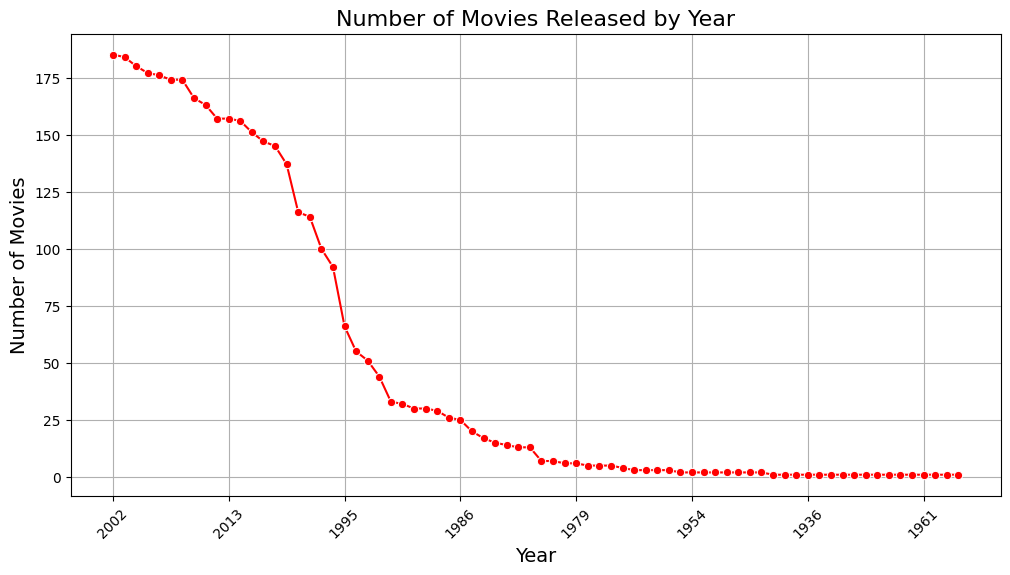

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'title_year' and count the number of 'movie_title', then sort by 'movie_count' in descending order
releasedate = df.groupby('title_year')['movie_title'].count().sort_values(ascending=False).reset_index(name='movie_count')

# Plot the number of movies released by year using a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='title_year', y='movie_count', data=releasedate, marker='o', linestyle='-', color='r')  # Add markers and set line style and color

# Add titles and labels
plt.title('Number of Movies Released by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)

# Customize the x-axis ticks for better readability
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels and set font size

# Set the x-axis tick frequency
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))  # Ensure ticks are integers

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()


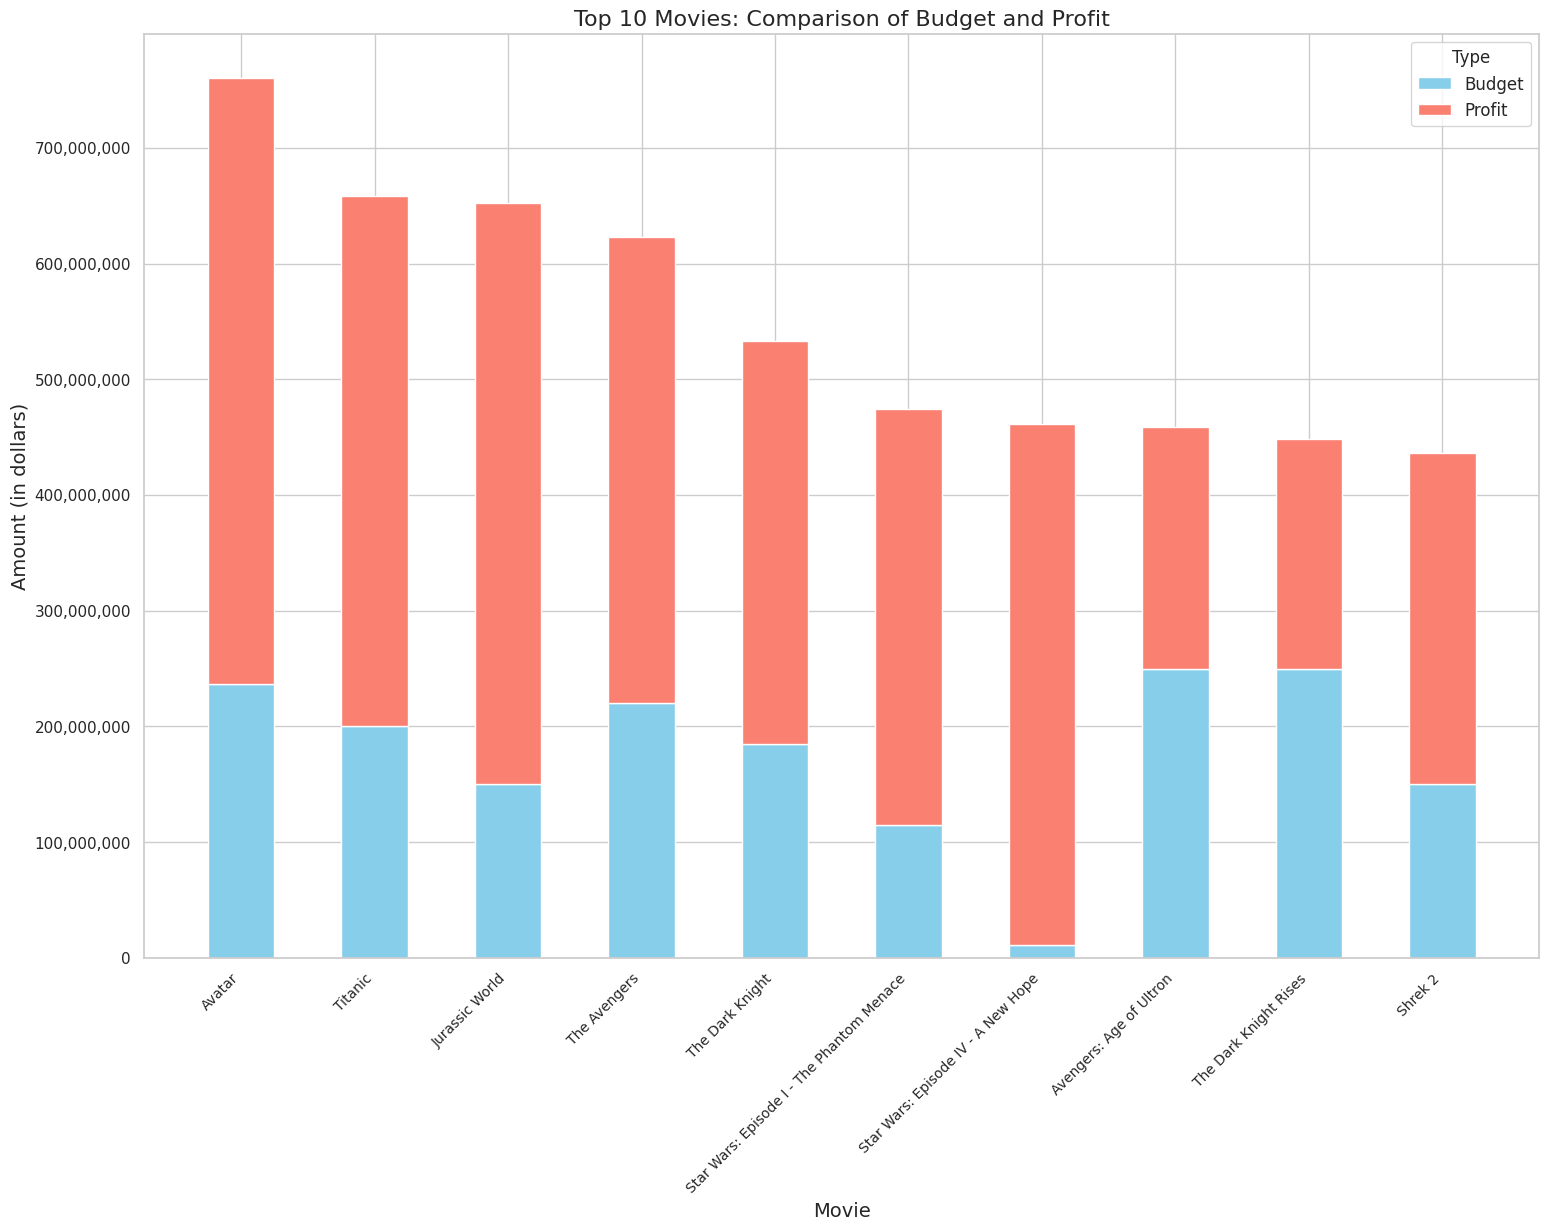

In [108]:
# Calculate total amount (budget + profit) and sort by it
df['total'] = df['budget'] + df['profit']
df_sorted = df.sort_values(by='total', ascending=False).head(10)

# Set the figure size
plt.figure(figsize=(18, 12))

# Create a stacked bar plot
bar_width = 0.5
movies = df_sorted['movie_title']
budget = df_sorted['budget']
profit = df_sorted['profit']

# Plot budget
plt.bar(movies, budget, bar_width, label='Budget', color='skyblue')

# Plot profit on top of budget
plt.bar(movies, profit, bar_width, bottom=budget, label='Profit', color='salmon')

# Customize the plot
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:,.0f}"))


plt.title('Top 10 Movies: Comparison of Budget and Profit', fontsize=16)
plt.xlabel('Movie', fontsize=14)
plt.ylabel('Amount (in dollars)', fontsize=14)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.legend(title='Type', fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

<ipython-input-103-a6af04621b28>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='imdb_score', y='director_name', data=director_movies, palette='magma', width=0.6)


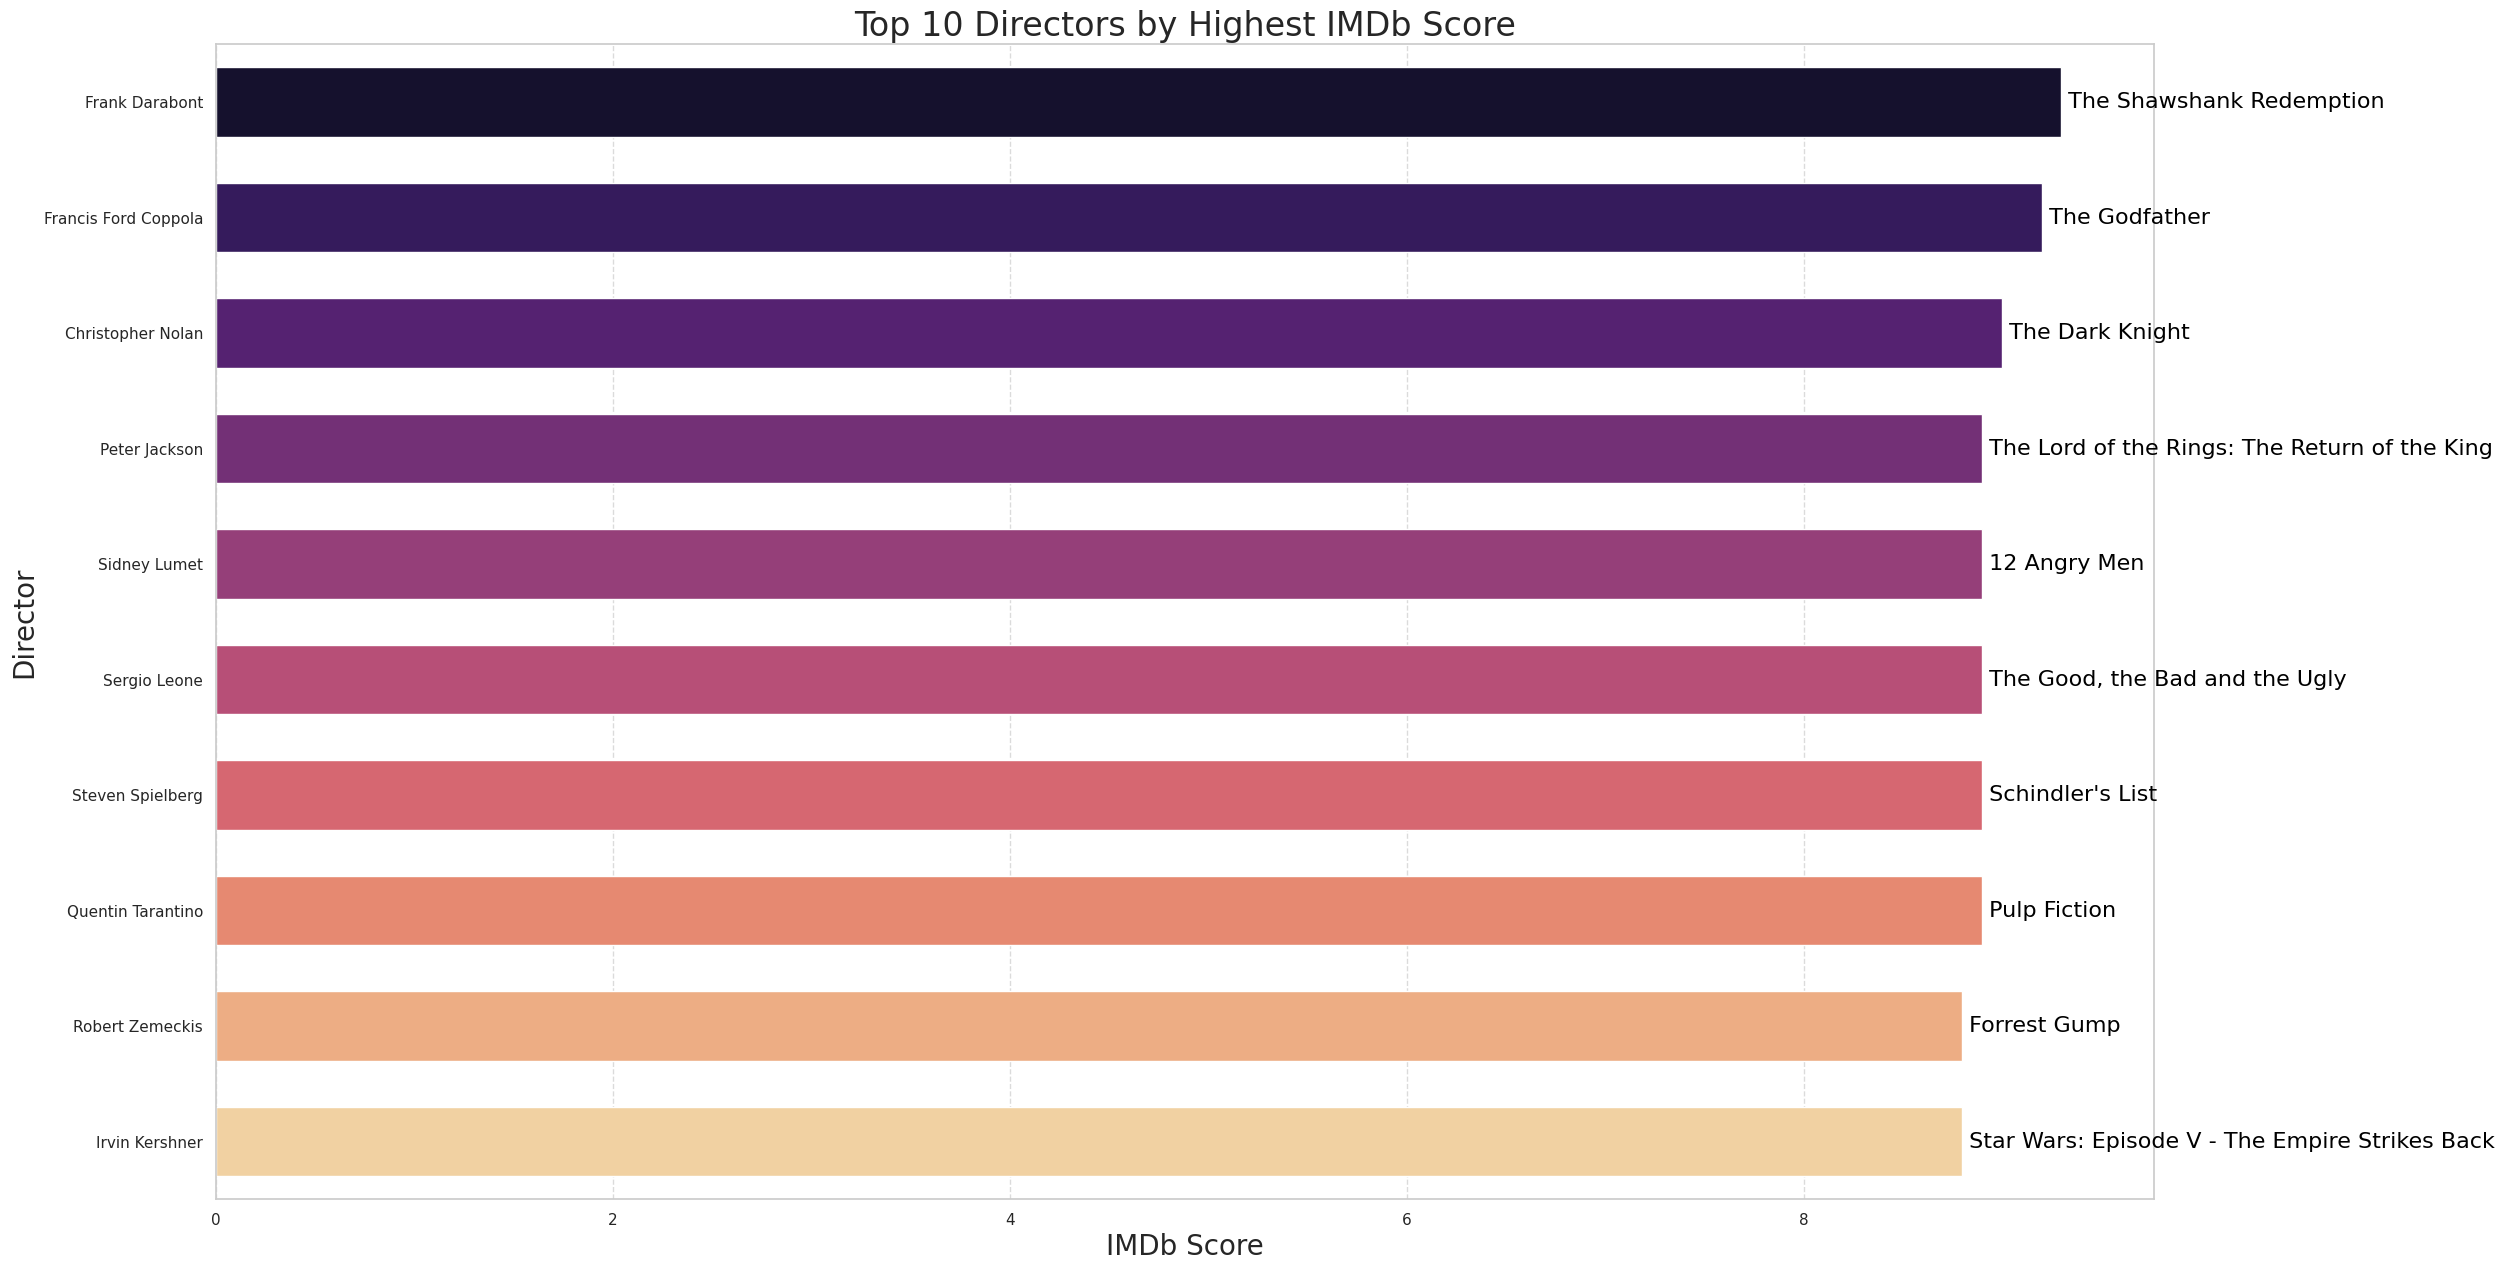

In [103]:

# Group by director and get the highest IMDb score along with the movie title
director_movies = df.loc[df.groupby('director_name')['imdb_score'].idxmax()][['director_name', 'movie_title', 'imdb_score']]
director_movies = director_movies.sort_values(by='imdb_score', ascending=False)[:10]

# Plot with kind 'barh'
plt.figure(figsize=(25, 15))
sns.barplot(x='imdb_score', y='director_name', data=director_movies, palette='magma', width=0.6)

# Plot labels
plt.title("Top 10 Directors by Highest IMDb Score", fontsize=24)
plt.xlabel('IMDb Score', fontsize=20)
plt.ylabel("Director", fontsize=20)

# Annotate with movie titles
for index, value in enumerate(director_movies['imdb_score']):
    plt.text(value, index, f" {director_movies['movie_title'].iloc[index]}", fontsize=16, va='center', color='black')

# Add gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

sns.set_style("whitegrid")
plt.show()
